# DMS Project US Theme Parks

#  1. Data cleaning + feature engineering

In [244]:
#Importing modules and libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from langdetect import detect
import string
import pickle
import spacy
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from pymer4 import Lmer
import re

In [245]:
#importing all the dataset csvs:
ds1 = pd.read_csv(r"C:\Users\Trabala\Desktop\DMS Datasets\Themeparkpt1.csv", encoding='cp1252',sep=';')
ds2 = pd.read_csv(r"C:\Users\Trabala\Desktop\DMS Datasets\Themeparkpt2.csv", encoding='cp1252',sep=';')
ds3 = pd.read_csv(r"C:\Users\Trabala\Desktop\DMS Datasets\Social media posts III.csv", delimiter=';', encoding='cp1252')
ds4 = pd.read_csv(r"C:\Users\Trabala\Desktop\DMS Datasets\Social media posts IV.csv", delimiter=';', encoding='cp1252')
df_flwcnt = pd.read_csv(r"C:\Users\Trabala\Desktop\DMS Datasets\Companies Digital marketing strategy_v2.csv")


### 1.A Follower count Dataset

In [246]:
# inspecting the dataset
df_flwcnt.head(3)

,Name,Type,Number of likes,Number of followers
0,Adventure City,Amusement Park,34000,34000.0
1,Belmont Park,Amusement Park,49000,50000.0
2,Big Kahuna's NJ,Amusement Park,176000,176000.0


In [247]:
df_flwcnt.dropna(inplace=True)

In [248]:
# assigning the column as an integer datatype
df_flwcnt['Number of followers'] = df_flwcnt['Number of followers'].astype('int', errors='ignore')

In [249]:
# creating the grouping based on number of followers
#df_flwcnt['Page_size'] = df_flwcnt['Number of followers'].apply(lambda x: 'Small' if x < 100000 else 'Medium' if 100000 < x < 500000 else 'Large')

df_flwcnt['Page_size'] = df_flwcnt['Number of followers'].apply(lambda x: 'Small' if x < 10000 else 'Medium' if 10000 <= x < 50000 else 'Large' if 50000 <= x < 500000 else 'Very Large')

In [250]:
df_flwcnt

,Name,Type,Number of likes,Number of followers,Page_size
0,Adventure City,Amusement Park,34000,34000,Medium
1,Belmont Park,Amusement Park,49000,50000,Large
2,Big Kahuna's NJ,Amusement Park,176000,176000,Large
3,Busch Gardens Tampa Bay,Amusement Park,668000,668000,Very Large
4,Busch Gardens Williamsburg,Amusement Park,685000,706000,Very Large
5,Calaway Park,Amusement Park,48000,48000,Medium
6,California's Great America,Amusement Park,260000,262000,Large
7,Canada's Wonderland,Amusement Park,848000,831000,Very Large
8,Castles N Coasters,Amusement Park,1600,1700,Small
9,Cedar Point,Amusement Park,1564000,1501000,Very Large


In [251]:
# renaming the column so it is identical with the fanpage dataset
df_flwcnt = df_flwcnt.rename({'Name':'Profile'}, axis=1)

### 1.B Fanpage Karma dataset

In [252]:
# Getting rid of the sum row
ds1.drop(ds1.tail(1).index, inplace=True)
ds2.drop(ds2.tail(1).index, inplace=True)
ds3.drop(ds3.tail(1).index, inplace=True)
ds4.drop(ds4.tail(1).index, inplace=True)

In [253]:
# Figuring out if the "Number of Shares" column is useless
print('Printing total number of NaNs in the column,', ds1['Number of Shares'].isnull().sum().sum())

Printing total number of NaNs in the column, 4933


In [254]:
# Combining the datasets into one
df = pd.concat([ds1,ds2], ignore_index=True)
df = pd.concat([df,ds3], ignore_index=True)
df = pd.concat([df,ds4], ignore_index=True)

In [255]:
# Cleaning by dropping unnecessary (empty) columns 
df.drop(columns=['Number of Shares','Unnamed: 14','Comments on posts by fans'], inplace=True)
df.rename(columns={'Number of Shares.1':'Number of Shares'}, inplace=True) # Renaming identical column
#Converting flt -> int
df[['Number of Reactions', 'Number of Comments (primary)','Number of Shares','Comments per post']] = df[['Number of Reactions', 'Number of Comments (primary)','Number of Shares','Comments per post']].astype(int)

In [256]:
# Checking how we looking
df.tail(10)

,Date,Profile,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Post interaction,Engagement,Profile-ID,Post-ID,Link
17461,8/20/21 3:00 PM,Playland Park,"Only a few more Friday night fireworks left this season, don't miss them, they start at 9:15 p.m. We open at noon, buy your tickets now: https://bit.ly/3da3c8P! #heycoaster #mywestchester",25,2,0,4,NaN,NaN,8.119909e+09,8119908863_10159381187053864,https://www.facebook.com/8119908863/posts/10159381187053864/
17462,8/20/21 8:15 AM,Centreville Amusement Park,-,25,8,0,11,NaN,NaN,1.177841e+14,117784088239988_4597087193642966,https://www.facebook.com/CentrevilleAmusementPark/photos/a.117820768236320/4597087193642966/?type=3
17463,8/20/21 2:03 AM,Kings Island,"Halloween Haunt has been nominated for best theme park Halloween event in the nation in the USA Today’s 10Best Readers’ Choice travel awards contest. To win, we need your help! You can vote once per day until voting ends Aug. 30 at noon ET. The winning event will be announced Sept. 10. #KingsIsland",262,29,68,43,0.000559,0.000559,1.558939e+11,155893938367_10161047693273368,https://www.facebook.com/155893938367/posts/10161047693273368/
17464,8/20/21 1:52 AM,Knott's Berry Farm,"Meet Crafty! Beginning this Friday, August 20, play 12 games at participating locations in the Boardwalk, Fiesta Village, and Camp Snoopy areas and win a 12-inch Crafty Coyote Squishmallow! See a games associate for a stamp card and more details. Squishmallows are available while supplies last.",123,7,15,11,0.000240,0.000240,1.028613e+10,10286130875_10157958185860876,https://www.facebook.com/KnottsBerryFarm/photos/a.104124665875/10157958185860876/?type=3
17465,8/20/21 12:26 AM,Wild Adventures Theme Park,"SURPRISE! ? We've expanded our Homecoming Weekend special admission offer to include local residents who have contributed to the success of our park. All residents of Lowndes and its surrounding counties, Brooks, Cook, Berrien, Lanier, Echols, Madison and Hamilton, can purchase single-day admission for themselves and up to (6) family members for $25 plus tax with proof of residence this Saturday, Aug. 21, and Sunday, Aug 22.Learn more: https://fal.cn/3hArw",20,5,16,5,0.000250,0.000250,8.467958e+10,84679583132_10158363148103133,https://www.facebook.com/84679583132/posts/10158363148103133
17466,8/20/21 12:00 AM,Happy Hollow Park & Zoo,"Shout out to our friends at Cheyenne Mountain Zoo for putting together these awesome orangutan-friendly guides to help us make responsible consumer choices for household essentials ???? These products are all produced by companies that are members of the Roundtable on Sustainable Palm Oil (RSPO) and are committed to making a difference for wild orangutans and other endangered species by using certified sustainable palm oil. The biggest threat to wild orangutans is deforestation for agriculture, very often for palm oil plantations. #WorldOrangutanDay",34,1,12,1,NaN,NaN,1.329428e+11,132942835175_10165554132320176,https://www.facebook.com/132942835175/posts/10165554132320176/
17467,8/20/21 12:00 AM,Big Kahuna's NJ,We ? to see all your ? #smiling #faces ! Even #maskedup we know what's under there!Let's #besafe this summer??Come create smiling memories with us here at ?#SaharaSams before the? #Summer ends!#TheySmile #YouSmile #WeSmile,3,0,0,0,NaN,NaN,2.645108e+10,26451078324_10158434440608325,https://www.facebook.com/Bigkahunasnj/photos/a.418756803324/10158434440608325/?type=3
17468,8/20/21 12:00 AM,SkyPark at Santa's Village,"Face painting is back on the weekends!Head over to the Discovery Playscape Deck every Saturday and Sunday from 11AM-4PM. Have fun choosing from colorful butterflies, lollipops, bikes and more. We can even transform you into Arrow! ?",15,0,1,0,NaN,NaN,6.533159e+14,653315854781004_4111863555592866,https://www.facebook.com/skyparksantasvillage/photos/a.653324294780160/4111863555592866/?type=3
17469,8/19/21 11:58 PM,California's Great America,MONSTERS WANTED ??Unleash you

In [257]:
# Separating the time data variable from the "Date" column and rearranging 
df['Time'] = df['Date'].str[-8:]
df['Day'] = df['Date'].str[:-8]
df = df[['Date', 'Day', 'Time', 'Profile', 'Message', 'Number of Reactions', 'Number of Comments (primary)', 'Number of Shares', 'Comments per post', 'Post interaction', 'Engagement', 'Profile-ID', 'Post-ID', 'Link']]

In [258]:
# Joining the two datasets  
df = pd.merge(df,df_flwcnt, on= 'Profile', validate='many_to_one')
df

,Date,Day,Time,Profile,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Post interaction,Engagement,Profile-ID,Post-ID,Link,Type,Number of likes,Number of followers,Page_size
0,7/21/22 12:05 AM,7/21/22,12:05 AM,Cedar Point,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",282,34,23,41,0.000222,0.000222,1.062569e+10,10625691462_10158936706621463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158936706621463/?type=3,Amusement Park,1564000,1501000,Very Large
1,7/18/22 9:00 PM,7/18/22,9:00 PM,Cedar Point,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",264,31,53,37,0.000227,0.000227,1.062569e+10,10625691462_10158933698001463,https://www.facebook.com/10625691462/posts/10158933698001463/,Amusement Park,1564000,1501000,Very Large
2,7/17/22 6:42 PM,7/17/22,6:42 PM,Cedar Point,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,406,18,22,23,0.000289,0.000289,1.062569e+10,10625691462_10158932110481463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158932110481463/?type=3,Amusement Park,1564000,1501000,Very Large
3,7/16/22 3:16 PM,7/16/22,3:16 PM,Cedar Point,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",214,173,13,189,0.000267,0.000267,1.062569e+10,10625691462_10158930461101463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158930461101463/?type=3,Amusement Park,1564000,1501000,Very Large
4,7/15/22 11:35 PM,7/15/22,11:35 PM,Cedar Point,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",422,39,11,55,0.000313,0.000313,1.062569e+10,10625691462_10158929715101463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158929715101463/?type=3,Amusement Park,1564000,1501000,Very Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,9/12/21 8:27 PM,9/12/21,8:27 PM,Funland Rehoboth Beach,"It’s our last day of operations today for the 2021 season. Another strange year in the books! A big THANK YOU from our family to you&yours for visiting, and also to our hard-working staff. See you all Mother’s Day weekend 2022! ???",1217,84,34,92,NaN,NaN,1.387177e+14,138717682836880_6281859535189300,https://www.facebook.com/138717682836880/posts/6281859535189300/,Amusement Park,"28,000",27000,Medium
16161,9/9/21 12:37 AM,9/9/21,12:37 AM,Funland Rehoboth Beach,"Big shout out to all the alumni who helped us out this summer and are heading back to their ""normal"" jobs. We talk about them a little in this WHYY piece (see link). Here is a photo of them with Al at our employee party and raffle on Sunday night ? https://www.youtube.com/watch?v=xPCafOTVtbE&list=PLjdphKjPqgdZlK83kt4zTrRIINcYEzhNp&index=6",473,17,11,19,NaN,NaN,1.387177e+14,138717682836880_6252092428166011,https://www.facebook.com/138717682836880/posts/6252092428166011/,Amusement Park,"28,000",27000,Medium
16162,9/6/21 6:27 PM,9/6/21,6:27 PM,Funland Rehoboth Beach,"We're less than a week away from our final day of the 2021 season, and hope to see you in before we close for the year! Please keep in mind that rides and games may be limited, and hours are subject to change.",144,16,26,22,NaN,NaN,1.387177e+14,138717682836880_6240200176021903,https://www.facebook.com/138717682836880/posts/6240200176021903/,Amusement Park,"28,000",27000,Medium
16163,9/1/21 4:42 PM,9/1/21,4:42 PM,Funland Rehoboth Beach,"**UPDATE:

In [259]:
# Creating a separate df with only columns that we need
df_cln = df[['Date', 'Day', 'Time', 'Profile', 'Page_size', 'Message', 'Number of Reactions', 'Number of Comments (primary)', 'Number of Shares', 'Comments per post', 'Post interaction', 'Engagement', 'Profile-ID', 'Post-ID', 'Link']]
df_cln = df_cln.dropna(subset=['Engagement','Number of Shares'])

In [260]:
df_cln

,Date,Day,Time,Profile,Page_size,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Post interaction,Engagement,Profile-ID,Post-ID,Link
0,7/21/22 12:05 AM,7/21/22,12:05 AM,Cedar Point,Very Large,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",282,34,23,41,0.000222,0.000222,1.062569e+10,10625691462_10158936706621463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158936706621463/?type=3
1,7/18/22 9:00 PM,7/18/22,9:00 PM,Cedar Point,Very Large,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",264,31,53,37,0.000227,0.000227,1.062569e+10,10625691462_10158933698001463,https://www.facebook.com/10625691462/posts/10158933698001463/
2,7/17/22 6:42 PM,7/17/22,6:42 PM,Cedar Point,Very Large,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,406,18,22,23,0.000289,0.000289,1.062569e+10,10625691462_10158932110481463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158932110481463/?type=3
3,7/16/22 3:16 PM,7/16/22,3:16 PM,Cedar Point,Very Large,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",214,173,13,189,0.000267,0.000267,1.062569e+10,10625691462_10158930461101463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158930461101463/?type=3
4,7/15/22 11:35 PM,7/15/22,11:35 PM,Cedar Point,Very Large,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",422,39,11,55,0.000313,0.000313,1.062569e+10,10625691462_10158929715101463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158929715101463/?type=3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16096,9/19/22 3:16 PM,9/19/22,3:16 PM,Playland Park,Small,"Only one weekend left in the season! Come visit us Friday, Saturday, or Sunday! ??",121,10,7,15,0.003245,0.003245,8.119909e+09,8119908863_458764752962002,https://www.facebook.com/422596063245538/posts/458764752962002
16097,9/17/22 8:56 PM,9/17/22,8:56 PM,Playland Park,Small,Get your perks today!! ???,9,0,0,0,0.000205,0.000205,8.119909e+09,8119908863_457487399756404,https://www.facebook.com/422596063245538/posts/457487399756404
16098,9/16/22 8:50 PM,9/16/22,8:50 PM,Playland Park,Small,Today: 5pm - 11pmSaturday: 12pm - 10pmSunday: 12pm - 8pmGrab your tickets at playland.com!,19,1,2,1,0.000501,0.000501,8.119909e+09,8119908863_456742346497576,https://www.facebook.com/422596063245538/posts/456742346497576
16099,9/15/22 5:26 PM,9/15/22,5:26 PM,Playland Park,Small,Calling all Teachers! We're showing our appreciation by giving all Teachers with a valid School ID FREE Admission on Sunday Sept. 18th!,22,3,10,3,0.000799,0.000799,8.119909e+09,8119908863_455905859914558,https://www.facebook.com/422596063245538/posts/455905859914558


In [261]:
# Figuring out if these two rows are identical
df_cln['Post interaction'].equals(df_cln['Engagement'])

True

In [262]:
#df_cln.to_csv(r'C:\Users\Trabala\Desktop\DMS Datasets\clean_dataset_ver2.csv')

[Text(0, 0, '10'), Text(0, 0, '25'), Text(0, 0, '19'), Text(0, 0, '2')]

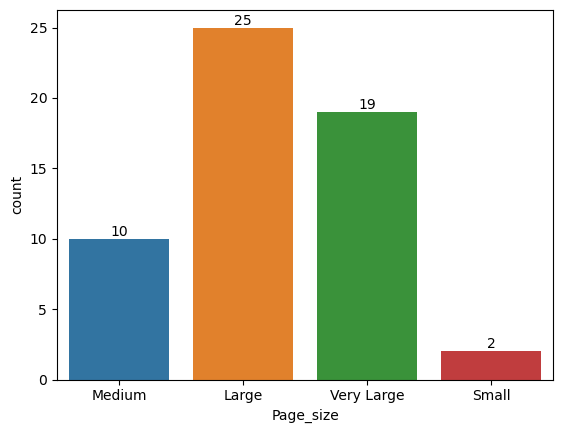

In [263]:
# Visualize the page size distribution in the entire uncleaned dataset
ax = sb.countplot(x= df_flwcnt['Page_size'])
ax.bar_label(ax.containers[0])

In [264]:
df_cln.describe()

,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Post interaction,Engagement,Profile-ID
count,14078.000000,14078.000000,14078.000000,14078.000000,14078.000000,14078.000000,1.407800e+04
mean,629.970166,41.614789,99.807359,64.248331,0.000996,0.000996,1.418970e+14
std,3707.548290,211.494700,933.368077,336.842191,0.007166,0.007166,3.728537e+14
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.119909e+09
25%,31.000000,2.000000,3.000000,2.000000,0.000111,0.000111,2.844245e+10
50%,107.000000,8.000000,10.000000,11.000000,0.000300,0.000300,8.001825e+10
75%,329.000000,23.000000,32.000000,35.000000,0.000765,0.000765,1.113826e+14
max,189901.000000,9264.000000,43071.000000,13953.000000,0.568516,0.568516,1.782696e+15


# 2. Additional text cleaning/ feature generation

In [265]:
# Trying to force the 'Message' column to a string dtype
df_cln['Message'] = df_cln['Message'].astype('string')
print(type(df_cln['Message']))

<class 'pandas.core.series.Series'>


In [266]:
# Figuring out if there are NaNs
nan_count = df['Message'].isna().sum()
nan_count

0

In [267]:
# Figure out the lenght of each message in the entire dataset
df_cln['Character_cnt'] = df_cln['Message'].apply(len)
df_cln[['Message','Character_cnt']]

,Message,Character_cnt
0,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",203
1,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",227
2,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,114
3,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",116
4,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",266
...,...,...
16096,"Only one weekend left in the season! Come visit us Friday, Saturday, or Sunday! ??",82
16097,Get your perks today!! ???,26
16098,Today: 5pm - 11pmSaturday: 12pm - 10pmSunday: 12pm - 8pmGrab your tickets at playland.com!,90
16099,Calling all Teachers! We're showing our appreciation by giving all Teachers with a valid School ID FREE Admission on Sunday Sept. 18th!,135


In [268]:
# Finding out irregularities in the dataset
df_cln[df_cln['Character_cnt'] < 3]

,Date,Day,Time,Profile,Page_size,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Post interaction,Engagement,Profile-ID,Post-ID,Link,Character_cnt
11,7/7/22 5:33 PM,7/7/22,5:33 PM,Cedar Point,Very Large,-,149,8,0,16,1.058329e-04,1.058329e-04,1.062569e+10,10625691462_10158917578216463,https://www.facebook.com/10625691462/posts/10158917578216463/,1
12,7/7/22 5:32 PM,7/7/22,5:32 PM,Cedar Point,Very Large,-,1,0,0,0,6.414117e-07,6.414117e-07,1.062569e+10,10625691462_10158917576896463,https://www.facebook.com/10625691462/posts/10158917576896463/,1
99,3/23/22 3:17 PM,3/23/22,3:17 PM,Cedar Point,Very Large,-,757,65,243,89,6.990264e-04,6.990264e-04,1.062569e+10,10625691462_10158741855536463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158741855536463/?type=3,1
200,9/6/22 3:42 PM,9/6/22,3:42 PM,Cedar Point,Very Large,-,29513,0,33756,0,4.042786e-02,4.042786e-02,1.062569e+10,10625691462_10159009971956463,https://www.facebook.com/10625691462/posts/10159009971956463/,1
219,3/17/22 5:18 PM,3/17/22,5:18 PM,Cedar Point,Very Large,-,758,14,80,29,5.564827e-04,5.564827e-04,1.062569e+10,10625691462_10158732783886463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158732783886463/?type=3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15923,11/20/22 9:23 PM,11/20/22,9:23 PM,Enchanted Island Amusement Park,Medium,-,4,1,0,1,3.639275e-04,3.639275e-04,1.206592e+14,120659204674179_625355746039171,https://www.facebook.com/EnchantedIslandAmusementPark/videos/625355746039171/,1
15924,11/20/22 6:46 PM,11/20/22,6:46 PM,Enchanted Island Amusement Park,Medium,-,9,0,0,0,6.550695e-04,6.550695e-04,1.206592e+14,120659204674179_5591851240934121,https://www.facebook.com/EnchantedIslandAmusementPark/videos/5591851240934121/,1
15926,11/15/22 6:37 PM,11/15/22,6:37 PM,Enchanted Island Amusement Park,Medium,-,1,0,0,0,7.280140e-05,7.280140e-05,1.206592e+14,120659204674179_8221689647904387,https://www.facebook.com/120659204674179/posts/8221689647904387/,1
15933,11/2/22 6:50 AM,11/2/22,6:50 AM,Enchanted Island Amusement Park,Medium,-,1,0,0,0,7.295542e-05,7.295542e-05,1.206592e+14,120659204674179_8159093350830684,https://www.facebook.com/120659204674179/posts/8159093350830684/,1


In [269]:
# Getting rid of the weird "-"" "?" and "??" cells by dropping abnormally short descriptions
#df_cln.drop(df_cln[df_cln['Character_cnt'] < 200].index, inplace = True)
df_cln.drop(df_cln[df_cln['Character_cnt'] < 100].index, inplace = True)
#Check result
df_cln[df_cln['Character_cnt'] < 100]

,Date,Day,Time,Profile,Page_size,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,Post interaction,Engagement,Profile-ID,Post-ID,Link,Character_cnt


In [270]:
# Gets rid of "http" and other links in the Message column and stores it in a new column
import re
df_cln['Message_cln'] = df_cln['Message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #Stackoverflow
# Defining a regular expression pattern to match "bit.ly/" links
pattern = r'bit\.ly\/\w+'

# Removing "bit.ly/" links from the 'text' column using regular expressions
df_cln['Message_cln'] = df_cln['Message_cln'].str.replace(pattern, '', regex=True) # Chat GPT
df_cln['Message_cln']

0                                                                                                                                                                           When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?
1                                                                                                                                                                         It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? 
2                                                                                                                                                                                                                                                       

In [271]:
# Print the mean value of the lenght of "messages" in the left over dataset
print(df_cln['Character_cnt'].mean())

265.9593232541397


In [272]:
# Make a column representing the number of #s in the text
df_cln['No_of_hashtags'] = df_cln['Message_cln'].str.count('#')

In [273]:
df_cln['No_of_hashtags'].astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
16090    2
16094    1
16095    0
16099    0
16100    0
Name: No_of_hashtags, Length: 11112, dtype: int32

In [274]:
# Make a category for hashtags to be used for a countplot
df_cln['Hashtags_group'] = df_cln['No_of_hashtags'].apply(lambda x:
    '1 #' if x == 1 else
    '2 #s' if x == 2 else
    '3 #s' if x == 3 else
    '4 #s' if x == 4 else
    '5 #s' if x == 5 else
    '6 or > #s' if x >= 6 else None)

In [275]:
df_cln['Has_hashtag'] = df_cln['No_of_hashtags'].apply(lambda x: True if x > 1 else False)

[Text(0, 0, '9789'), Text(0, 0, '1323')]

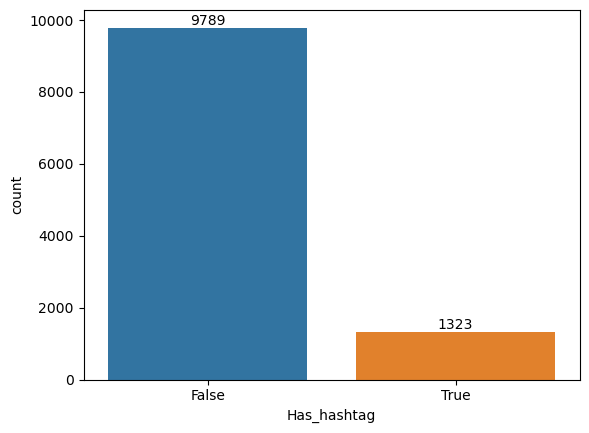

In [276]:
ax = sb.countplot(x= df_cln['Has_hashtag'])
ax.bar_label(ax.containers[0])

In [277]:
# Create a separate df for text analysis
df_text = df_cln[['Profile','Page_size','Engagement','Number of Reactions','Number of Shares','Message','Message_cln','Has_hashtag','No_of_hashtags','Hashtags_group','Character_cnt']]

In [278]:
# Create a copy of the column and remove links and hashtags have only text with basic punctuation left
df_text['Message_no_hashlinks'] = df_text['Message_cln']
df_text['Message_no_hashlinks'] = df_text['Message_no_hashlinks'].apply(lambda x: x.replace('?', ''))
# Defining a regular expression pattern to match hashtags/@ sings and text that follows them
pattern = r'[#@][^\s]*\s?'

# Removing hashtags and any text that immediately follows them using regular expressions
df_text['Message_no_hashlinks'] = df_text['Message_no_hashlinks'].str.replace(pattern, '', regex=True)

C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\2238954296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Message_no_hashlinks'] = df_text['Message_cln']
C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\2238954296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Message_no_hashlinks'] = df_text['Message_no_hashlinks'].apply(lambda x: x.replace('?', ''))
C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\2238954296.py:8: SettingWithCopyWarning: 
A value is trying to be set o

In [279]:
# Turn all into lowercase
df_text['Message_cln'] = df_text['Message_cln'].str.lower()
# Get rid of numbers in the message 
df_text['Message_cln'] = df_text['Message_cln'].str.replace('\d+', '', regex=True)
# Remove punctuation
df_text['Message_cln'] = df_text['Message_cln'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# Get rid of Hashtags in the message
df_text['Message_cln'] = df_text['Message_cln'].apply(lambda x: x.replace('#', ''))

print(df_cln['Message_cln'])

0                                                                                                                                                                           When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?
1                                                                                                                                                                         It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? 
2                                                                                                                                                                                                                                                       

C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\1734628992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Message_cln'] = df_text['Message_cln'].str.lower()
C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\1734628992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Message_cln'] = df_text['Message_cln'].str.replace('\d+', '', regex=True)
C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\1734628992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [280]:
# cols_to_change = ['Dummy_msg']
# for col in cols_to_change:
#     df_cln[col] = df_cln[col].str.replace('[^a-zA-Z0-9]', '')

In [281]:
#df_cln['Message_cln'] = df_cln['Message_cln'].apply(lambda x: x.str.replace('[^a-zA-Z]', ''))

In [282]:
# Detect all rows that are not in English language "https://stackoverflow.com/questions/43916600/text-language-detection-in-python"

def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_text['Eng_lang'] = df_text['Message_cln'].apply(detect_en)
df_text

C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\3457873669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Eng_lang'] = df_text['Message_cln'].apply(detect_en)


,Profile,Page_size,Engagement,Number of Reactions,Number of Shares,Message,Message_cln,Has_hashtag,No_of_hashtags,Hashtags_group,Character_cnt,Message_no_hashlinks,Eng_lang
0,Cedar Point,Very Large,0.000222,282,23,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",when you book a stay at hotel breakers the fun begins did you know you get access to discounted tickets to both cedar point and cedar point shores waterpark free parking and unlimited beach access,False,0,None,203,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access!",True
1,Cedar Point,Very Large,0.000227,264,53,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",it’s truce day at cedar point and you’re invited journey to forbidden frontier on adventure island the possibilities are endless open daily except wednesdays from pmpm now through august th,False,0,None,227,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless! Open daily, except Wednesday's from 12pm-7pm now through August 14th!",True
2,Cedar Point,Very Large,0.000289,406,22,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,curtis the cow is awful hungry at the barnyard pay him a visit the time youre at cedar point open pm daily,False,0,None,114,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! Open 12pm daily!,True
3,Cedar Point,Very Large,0.000267,214,13,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",which team do you got on geminicomment for the red train or for the blue train lets see which team wins,False,0,None,116,"Which team do you got on GeminiComment """" for the red train or """" for the blue train! Let's see which team wins!",True
4,Cedar Point,Very Large,0.000313,422,11,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",announcing a new member of our social media teamcedar point welcomes alyse gillentine digital communications manager learn more about alyse her passion for the park in our latest blog entry and tell us topics youd like c us cover,False,0,None,266,"Announcing a new member of our social media team...Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover!",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,Playland Park,Small,0.000374,15,1,"We're already counting down the days until next season! In the meantime, share your favorite summer memories with the hashtag #PlaylandSummer ? #repost from @durgamccurdy",were already counting down the days until next season in the meantime share your favorite summer memories with the hashtag playlandsummer repost from durgamccurdy,True,2,2 #s,170,"We're already counting down the days until next season! In the meantime, share your favorite summer memories with the hashtag from",True
16094,Playland Park,Small,0.000271,11,1,Face ? Painting in Kiddyland! This Saturday and Sunday from 12:30pm - 5:30pm. Come celebrate #CustomerAppreciation Weekend! General admission and unlimited rides for only $19.99 all weekend long!,face painting in kiddyland this sa

In [283]:
# Filter out all the rows for which English "Lang" = False
df_text[~df_text["Eng_lang"]]

,Profile,Page_size,Engagement,Number of Reactions,Number of Shares,Message,Message_cln,Has_hashtag,No_of_hashtags,Hashtags_group,Character_cnt,Message_no_hashlinks,Eng_lang
319,Cedar Point,Very Large,0.000636,805,87,We're feeling SPOOKY! ? Haunted houses open at 5:00 p.m. and outdoor scare zones open at 7:00 p.m. We'll see you sooooooon! ?,were feeling spooky haunted houses open at pm and outdoor scare zones open at pm well see you sooooooon,False,0,None,125,We're feeling SPOOKY! Haunted houses open at 5:00 p.m. and outdoor scare zones open at 7:00 p.m. We'll see you sooooooon!,False
1181,Playland,Large,0.000009,3,0,"Magia e divers?o no teatro do Play para toda família! A Cinderela e os Saltimbancos vieram fazer uma visita pra lá de especial e voc? n?o pode perder este encontro mágico! ?Clique nos links https://bit.ly/3v4GQOK, https://bit.ly/3Op7YPr e saiba mais!",magia e diverso no teatro do play para toda família a cinderela e os saltimbancos vieram fazer uma visita pra lá de especial e voc no pode perder este encontro mágico clique nos links,False,0,None,250,Magia e diverso no teatro do Play para toda família! A Cinderela e os Saltimbancos vieram fazer uma visita pra lá de especial e voc no pode perder este encontro mágico! Clique nos links,False
1182,Playland,Large,0.000003,1,0,"A nossa agenda de agosto já está disponível para voc? fazer a festa mais legal de todas! Só aqui voc? tem: ? As atraç?es mais queridas do Play para voc? se divertir com os convidados,?Um sal?o exclusivo e equipado, ? Timecards para os convidados e um Playcard Free para o aniversariante + bônus para a próxima visita.Tudo isso cabendo no seu bolso. Vai mesmo perder?Clique no link https://bit.ly/3OoFxRE e saiba como agendar e comemorar aqui no Play!",a nossa agenda de agosto já está disponível para voc fazer a festa mais legal de todas só aqui voc tem as atraçes mais queridas do play para voc se divertir com os convidadosum salo exclusivo e equipado timecards para os convidados e um playcard free para o aniversariante bônus para a próxima visitatudo isso cabendo no seu bolso vai mesmo perderclique no link,False,0,None,450,"A nossa agenda de agosto já está disponível para voc fazer a festa mais legal de todas! Só aqui voc tem: As atraçes mais queridas do Play para voc se divertir com os convidados,Um salo exclusivo e equipado, Timecards para os convidados e um Playcard Free para o aniversariante + bônus para a próxima visita.Tudo isso cabendo no seu bolso. Vai mesmo perderClique no link",False
1183,Playland,Large,0.000012,1,0,"Aberto todos os dias!? Voc? sabia que o Playland abre todos os dias?? Cada unidade possui um horário de funcionamento diferenciado e voc? pode conferir todos os horários em nosso site.? Vem aproveitar as nossas atraç?es incríveis, os jogos eletrizantes, a famosa - e deliciosa - pipoca do Play e muita divers?o em família....#GrupoPlaycenter #Playland #PlaylandOficial #ShoppingInterlagos #ShoppingEldorado #ShoppingUniaoDeOsasco #ShoppingCenterNorte #ShoppingMetroTatuape #GrandPlazaShopping #ShoppingDaBahia #PlaylandSalvador #SPParaCriancas #PasseiosEmSP #PasseioComCriancas",aberto todos os dias voc sabia que o playland abre todos os dias cada unidade possui um horário de funcionamento diferenciado e voc pode conferir todos os horários em nosso site vem aproveitar as nossas atraçes incríveis os jogos eletrizantes a famosa e deliciosa pipoca do play e muita diverso em famíliagrupoplaycenter playland playlandoficial shoppinginterlagos shoppingeldorado shoppinguniaodeosasco shoppingcenternorte shoppingmetrotatuape grandplazashopping shoppingdabahia playlandsalvador spparacriancas passeiosemsp passeiocomcriancas,True,14,6 or > #s,577,"Aberto todos os dias! Voc sabia que o Playland abre todos os dias Cada unidade possui um horário de funcionamento diferenciado e voc pode conferir todos os horários em nosso site. Vem aproveitar as nossas atraçes incríveis, os jogos eletrizantes, a famosa - e deliciosa - pipoca do Play e muita diverso em f

In [284]:
# Drop all rows for which the "Eng_lang" column = False
df_text.drop(df_text[df_text['Eng_lang'] == False].index, inplace = True)

C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\1575212571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text.drop(df_text[df_text['Eng_lang'] == False].index, inplace = True)


[Text(0, 0, '1851'),
 Text(0, 0, '472'),
 Text(0, 0, '278'),
 Text(0, 0, '213'),
 Text(0, 0, '85'),
 Text(0, 0, '145')]

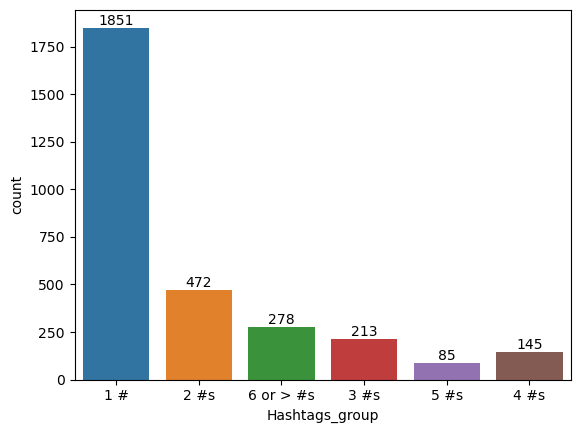

In [285]:
ax = sb.countplot(x= df_text['Hashtags_group'])
ax.bar_label(ax.containers[0])

# 3. Text Feature Generation

### 3.A Gunning-fog

In [286]:
# Define a function that splits sentences into words, then performs the calculation according to the gunning fog formula
def calculate_gunning_fog(text):
    # Splitting the text into sentences
    sentences = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text) 

    # Counting the number of words and complex words
    num_words = 0
    num_complex_words = 0
    for sentence in sentences:
        words = sentence.split() #Splits the already split sentences into words
        num_words += len(words) #Counts number of words
        for word in words:
            if len(word) >= 3 and len(re.findall('[aeiouyAEIOUY]+', word)) >= 3: #Looks for words including atleast three vowels #Stackoverflow: https://stackoverflow.com/questions/64913751/find-words-from-the-list-that-contains-at-least-3-vowels
                num_complex_words += 1 #Adds one to the list for each "complex" word 

    # Calculating the Gunning-Fog score
    if num_words == 0:
        return 0
    else:
        return 0.4 * ((num_words / len(sentences)) + (100 * (num_complex_words / num_words)))


# Calculate the Gunning-Fog score for each cell in the cleaned 'Message' column
df_text['Gunning-Fog Score'] = df_text['Message_no_hashlinks'].apply(calculate_gunning_fog)

# Print the dataframe with the Gunning-Fog scores
print(df_text['Gunning-Fog Score'])


0        17.428571
1        18.666667
2         8.800000
3        10.939130
4        25.180488
           ...    
16090    16.019048
16094    14.430769
16095    11.499661
16099     8.036364
16100    12.488889
Name: Gunning-Fog Score, Length: 10507, dtype: float64


C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\3719177068.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Gunning-Fog Score'] = df_text['Message_no_hashlinks'].apply(calculate_gunning_fog)


In [287]:
df_text.loc[df_text['Gunning-Fog Score'] > 20.0, "Gunning-Fog Score"] = 20.0 
df_text[['Message_no_hashlinks','Gunning-Fog Score']]

,Message_no_hashlinks,Gunning-Fog Score
0,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access!",17.428571
1,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless! Open daily, except Wednesday's from 12pm-7pm now through August 14th!",18.666667
2,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! Open 12pm daily!,8.800000
3,"Which team do you got on GeminiComment """" for the red train or """" for the blue train! Let's see which team wins!",10.939130
4,"Announcing a new member of our social media team...Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover!",20.000000
...,...,...
16090,"We're already counting down the days until next season! In the meantime, share your favorite summer memories with the hashtag from",16.019048
16094,Face Painting in Kiddyland! This Saturday and Sunday from 12:30pm - 5:30pm. Come celebrate Weekend! General admission and unlimited rides for only $19.99 all weekend long!,14.430769
16095,"This weekend, we are celebrating our amazing guests! We are pleased to offer EVERYONE admission and unlimited rides for $19.99 all weekend long! It's the last weekend of the season...so don't miss your chance to make some memories. Offer valid Friday Sept. 23 through Sunday Sept. 25th! Visit playland.com to plan your visit. This offer is not available online.",11.499661
16099,Calling all Teachers! We're showing our appreciation by giving all Teachers with a valid School ID FREE Admission on Sunday Sept. 18th!,8.036364


In [288]:
pd.set_option('display.max_colwidth', None) # to display entire text

df_text[(df_text['Gunning-Fog Score'] == 20.0)][['Message','Message_no_hashlinks']]

,Message,Message_no_hashlinks
4,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j","Announcing a new member of our social media team...Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover!"
14,"?3...MILLION...RIDERS????Liam from Lorain, Ohio, pictured here with his sister Amelia and parents Zach & Naomi, was the 3 MILLIONTH all-time rider on Steel Vengeance, and it happened today!??Liam received some SV goodies and a memory to keep forever! Congrats, Liam!","3...MILLION...RIDERSLiam from Lorain, Ohio, pictured here with his sister Amelia and parents Zach & Naomi, was the 3 MILLIONTH all-time rider on Steel Vengeance, and it happened today!Liam received some SV goodies and a memory to keep forever! Congrats, Liam!"
17,TOMORROW: Cedar Point's fabulous ?Light Up The Point Fireworks? at 10:00 PM.??Enjoy the best seats in the house in a private VIP area ON the beach with an A.Y.C.E. buffet just before the show.Book now b4 it sells out: bit.ly/LUTPoint,TOMORROW: Cedar Point's fabulous Light Up The Point Fireworks at 10:00 PM.Enjoy the best seats in the house in a private VIP area ON the beach with an A.Y.C.E. buffet just before the show.Book now b4 it sells out:
21,"It's ALMOST TIME!? Light Up The Point Fireworks? Monday, July 4? Cedar Point Beach? 10:00 PM (weather permitting)? Be a VIP with the best seats in the house: a private viewing area with chairs ON the beach, plus an all-you-can-eat buffet, both included in your Light Up The Point VIP event ticket.??BUY NOW b4 it sells out: bit.ly/LUTPoint","It's ALMOST TIME! Light Up The Point Fireworks Monday, July 4 Cedar Point Beach 10:00 PM (weather permitting) Be a VIP with the best seats in the house: a private viewing area with chairs ON the beach, plus an all-you-can-eat buffet, both included in your Light Up The Point VIP event ticket.BUY NOW b4 it sells out:"
24,"?Where's the best spot for our 4th of July fireworks? In our VIP seating!?Enjoy a private viewing area with chairs ON the beach, plus an all-you-can-eat buffet, both included in your Light Up The Point VIP event ticket.??Learn more and BUY NOW: bit.ly/LUTPoint","Where's the best spot for our 4th of July fireworks In our VIP seating!Enjoy a private viewing area with chairs ON the beach, plus an all-you-can-eat buffet, both included in your Light Up The Point VIP event ticket.Learn more and BUY NOW:"
...,...,...
15892,"Introducing an all-new way to experience Six Flags! Discover our parks your way, with 2022 passes and perks.With three different options to choose from, we made sure you find the best offer that fits you and your family. From facing your fears and making lifelong memories, to indulging in foodie favorites and escaping reality, you're bound to find the adventure that you're looking for!This is Six Flags, come make it yours! For more information, visit: https://6fla.gs/HHOKC-tickets","Introducing an all-new way to experience Six Flags! Discover our parks your way, with 2022 passes and perks.With three different options to choose from, we made sure you find the best offer that fits you and your family. From facing your fears and making lifelong memories, to indulging in foodie favorites and escaping reality, you're bound to find the adventure that you're looking for!This is Six Flags, come make it yours! For more information, visit:"
15927,"Annual Harvest FestivalNovember 19th and 20th 2022 11am to 6pmTake a Historic Hayride thru the Encanto Park Neighborhood (first developed Phoenix Community)Go on a Pony Ride (weight restrictions)Cake WalkPlay in the Corn BoxVisit with animals at the Petting ZooPlay Carnival Games: Ring Toss or Pumpkin Fish PondPumpkin GolfBat

In [289]:
df_text[(df_text['Gunning-Fog Score'] <= 5.0)][['Message','Message_no_hashlinks','Gunning-Fog Score']]

,Message,Message_no_hashlinks,Gunning-Fog Score
140,ONE. LAST. WEEKEND. ?Get your last thrills of the 2022 season this weekend! You do not want to miss out on #HalloWeekends25. Plan your visit here ? cedarpoint.com/halloweekends,ONE. LAST. WEEKEND. Get your last thrills of the 2022 season this weekend! You do not want to miss out on Plan your visit here cedarpoint.com/halloweekends,4.138462
198,? SEASON PASSHOLDER HOTEL DEAL ?BIG SAVINGS THIS WEEKEND!?? Check In This Friday (9/9). Stay Two Nights. Receive Great Rates.?? Two Nights at Hotel Breakers as low as $299 total.?? Two Nights at Express Hotel as low as $199 total.?? Request Promo Code: PASS? https://bit.ly/3BjpD7Y,SEASON PASSHOLDER HOTEL DEAL BIG SAVINGS THIS WEEKEND! Check In This Friday (9/9). Stay Two Nights. Receive Great Rates. Two Nights at Hotel Breakers as low as $299 total. Two Nights at Express Hotel as low as $199 total. Request Promo Code: PASS,4.727132
374,It's never easy saying goodbye... Read more about what we have planned for #WickedTwister's Last Launch here: bit.ly/3mX4XMj,It's never easy saying goodbye... Read more about what we have planned for Last Launch here:,3.200000
383,"Renew your Gold Pass for only $99! This price only lasts until Labor Day, Sept. 6. Get yours now: cedarpoint.com/pass.","Renew your Gold Pass for only $99! This price only lasts until Labor Day, Sept. 6. Get yours now: cedarpoint.com/pass.",4.666667
414,Dreaming of Happy Hour at High Tide Brews. ?Join us tonight and get your weekend started with $2 flights (four 5oz. tasters) from 4-7pm!,Dreaming of Happy Hour at High Tide Brews. Join us tonight and get your weekend started with $2 flights (four 5oz. tasters) from 4-7pm!,3.200000
...,...,...,...
15664,Watch as Jeff Kinney shares his story of inspiration for Diary of a Wimpy Kid. Stream it now on Disney+. ?,Watch as Jeff Kinney shares his story of inspiration for Diary of a Wimpy Kid. Stream it now on Disney+.,4.666667
15701,Listen up!? Here's what you need to know about Diary of a Wimpy Kid in 60 seconds. Stream Diary of a #WimpyKid this Friday on Disney+ to get the full deets. ?,Listen up! Here's what you need to know about Diary of a Wimpy Kid in 60 seconds. Stream Diary of a this Friday on Disney+ to get the full deets.,4.000000
15847,Now hiring ?Call 719-684-9432 or email jobs@northpolecolorado.comhttps://northpolecolorado.com/employment/,Now hiring Call 719-684-9432 or email jobs,2.800000
16085,We miss you! ???? Counting down to our next season of fun!#PlaylandPark #RyePlayland #TourismNY #ILoveNY #WestchesterTourism #WestchesterCounty #HistoricLandmark #Summer2022,We miss you! Counting down to our next season of fun!,4.400000


In [291]:
df_text[['Message_no_hashlinks','Gunning-Fog Score','Character_cnt']]

,Message_no_hashlinks,Gunning-Fog Score,Character_cnt
0,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access!",17.428571,203
1,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless! Open daily, except Wednesday's from 12pm-7pm now through August 14th!",18.666667,227
2,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! Open 12pm daily!,8.800000,114
3,"Which team do you got on GeminiComment """" for the red train or """" for the blue train! Let's see which team wins!",10.939130,116
4,"Announcing a new member of our social media team...Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover!",20.000000,266
...,...,...,...
16090,"We're already counting down the days until next season! In the meantime, share your favorite summer memories with the hashtag from",16.019048,170
16094,Face Painting in Kiddyland! This Saturday and Sunday from 12:30pm - 5:30pm. Come celebrate Weekend! General admission and unlimited rides for only $19.99 all weekend long!,14.430769,195
16095,"This weekend, we are celebrating our amazing guests! We are pleased to offer EVERYONE admission and unlimited rides for $19.99 all weekend long! It's the last weekend of the season...so don't miss your chance to make some memories. Offer valid Friday Sept. 23 through Sunday Sept. 25th! Visit playland.com to plan your visit. This offer is not available online.",11.499661,366
16099,Calling all Teachers! We're showing our appreciation by giving all Teachers with a valid School ID FREE Admission on Sunday Sept. 18th!,8.036364,135


In [293]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10507 entries, 0 to 16100
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Profile               10507 non-null  object 
 1   Page_size             10507 non-null  object 
 2   Engagement            10507 non-null  float64
 3   Number of Reactions   10507 non-null  int32  
 4   Number of Shares      10507 non-null  int32  
 5   Message               10507 non-null  string 
 6   Message_cln           10507 non-null  object 
 7   Has_hashtag           10507 non-null  bool   
 8   No_of_hashtags        10507 non-null  int64  
 9   Hashtags_group        3044 non-null   object 
 10  Character_cnt         10507 non-null  int64  
 11  Message_no_hashlinks  10507 non-null  object 
 12  Eng_lang              10507 non-null  bool   
 13  Gunning-Fog Score     10507 non-null  float64
dtypes: bool(2), float64(2), int32(2), int64(2), object(5), string(1)
memor

### 3.B Topic Modelling

In [295]:
# Turning column of Text descriptions to list
text = df_text['Message_no_hashlinks'].tolist()
nlp = spacy.load("en_core_web_sm")
type(nlp)

spacy.lang.en.English

In [296]:
# Testing1

text[0]

for token in nlp(text[4]):
    print(token)

'When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! '

Announcing
a
new
member
of
our
social
media
team
...
Cedar
Point
welcomes
Alyse
Gillentine
,
Digital
Communications
Manager
!
Learn
more
about
Alyse
&
her
passion
for
the
park
in
our
latest
blog
entry
,
and
tell
us
topics
you
'd
like
2
c
us
cover
!


In [297]:
# Testing 2
tokenization_example = nlp("When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?")
for token in tokenization_example:
    print(token)

When
you
book
a
stay
at
Hotel
Breakers
,
the
fun
begins
!
Did
you
know
you
get
access
to
discounted
tickets
to
both
Cedar
Point
and
Cedar
Point
Shores
Waterpark
,
free
parking
,
and
unlimited
beach
access
!
?


In [298]:
# Testing 3
tokenization_example.ents
for i in tokenization_example.ents:
    print("Spacy recognized entity: {}, which has been labelled as: {}".format(i, i.label_))

(Hotel Breakers, Cedar Point, Cedar Point)

Spacy recognized entity: Hotel Breakers, which has been labelled as: FAC
Spacy recognized entity: Cedar Point, which has been labelled as: ORG
Spacy recognized entity: Cedar Point, which has been labelled as: ORG


In [299]:
# Tokenization of text
docs = [nlp.make_doc(x) for x in text]

In [300]:
# Checking stop words
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'several', 'latter', 'since', "'re", 'now', 'but', 'doing', 'whole', 'hereby', 'anyhow', 'out', 'together', 'hereafter', 'you', 'why', 'our', 'indeed', 'once', 'somewhere', 'whereas', 'whatever', 'six', 'thru', 'did', '‘d', 'two', 'or', 'by', 'becomes', 'sixty', 'is', 'too', 'within', 'down', 'everywhere', 'both', 'would', 'whither', 'might', 'was', 'nobody', 'throughout', 'there', 'three', 'enough', '’re', 'never', 'ourselves', 'us', 'ever', 'her', 'will', 'around', 'then', "'s", 'seeming', 'from', 'in', 'herein', 'after', 'with', 'had', 'afterwards', 'bottom', 'which', 'moreover', 'another', 'and', 'i', 'nor', 'below', 'has', 'seem', 'alone', 'became', '’ll', 'mostly', 'noone', 'whereafter', 'due', 'must', '’s', 'via', 'anywhere', 'so', 'may', 'himself', 'meanwhile', 'either', 'this', 'third', 'take', 'up', 'across', 're', '‘ll', 'few', 'towards', 'for', 'into', 'mine', 'we', 'other', 'quite', 'please', 'along', 'over', 'somehow', 'serious', 'thus', 'herself', 'thereupon', '‘ve', 'a

In [301]:
digit_re = re.compile('^([0-9]|[\\.,])*$')
tokens_cln = []
for doc in docs:
    new_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not re.match(digit_re, token.text):
            new_tokens.append(token.text) 
    tokens_cln.append(new_tokens)

In [302]:
tokens_cln

[['book',
  'stay',
  'Hotel',
  'Breakers',
  'fun',
  'begins',
  'know',
  'access',
  'discounted',
  'tickets',
  'Cedar',
  'Point',
  'Cedar',
  'Point',
  'Shores',
  'Waterpark',
  'free',
  'parking',
  'unlimited',
  'beach',
  'access'],
 ['Truce',
  'Day',
  'Cedar',
  'Point',
  'invited',
  'Journey',
  'Forbidden',
  'Frontier',
  'Adventure',
  'Island',
  'possibilities',
  'endless',
  'Open',
  'daily',
  'Wednesday',
  '12pm-7pm',
  'August',
  '14th'],
 ['Curtis',
  'cow',
  'awful',
  'hungry',
  'Barnyard',
  'Pay',
  'visit',
  'time',
  'Cedar',
  'Point',
  'Open',
  'pm',
  'daily'],
 ['team',
  'got',
  'GeminiComment',
  'red',
  'train',
  'blue',
  'train',
  'Let',
  'team',
  'wins'],
 ['Announcing',
  'new',
  'member',
  'social',
  'media',
  'team',
  'Cedar',
  'Point',
  'welcomes',
  'Alyse',
  'Gillentine',
  'Digital',
  'Communications',
  'Manager',
  'Learn',
  'Alyse',
  'passion',
  'park',
  'latest',
  'blog',
  'entry',
  'tell',
  'to

In [303]:
def dummy(doc):
    return doc

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cln)
type(frequency_matrix)

scipy.sparse._csr.csr_matrix

In [304]:
count_vectorizer.get_feature_names_out()[:50]

array([' ', '  ', '   ', '    ', '     ', '      ', '          ',
       '               ', '"Check', '"Chip', '$', "'bout", "'em", '*Ride',
       '+', '--birth', '-10', '-12:00', '-13th!Veterans', '-30Experience',
       '-30th', '-7pm', '-Aggie', '-August', '-Bowl', '-DuskSaturday',
       '-Food', '-Specials', '-Thursday', '-ben', '-firepits', '-hrs',
       '-mbc', '-open', '-s', '-studded', '-tickets', '-winning',
       '-wonder', '.A.', '.Blast', '.But', '.CP', '.Chip', '.Download',
       '.Float', '.Looking', '.Starting', '.Thank', '.There'],
      dtype=object)

In [305]:
# Vectorize the text to create a frequence metrix

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_features=5000 # cap the maximum amount of features the vectorizer can take
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cln)

In [306]:
frequency_matrix

<10507x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 179507 stored elements in Compressed Sparse Row format>

In [307]:
# Transform it further to get the "term frequency - inverse document frequency" maxtrix
tfd_idf_trans = TfidfTransformer()
tf_idf_matrix = tfd_idf_trans.fit_transform(frequency_matrix)
tf_idf_matrix

<10507x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 179507 stored elements in Compressed Sparse Row format>

In [308]:
# Specify the hyperparamter of the desired amount of topics (number of columns)
model = NMF(n_components=8, init='nndsvd') # 8 topics in this case

# fit the model
model.fit(X=tf_idf_matrix)

NMF(init='nndsvd', n_components=8)

In [309]:
# the model.components_ matrix is the H matrix mapping topics to word weights
model.components_
model.components_.shape

array([[0.        , 0.06978915, 0.01005469, ..., 0.01632571, 0.        ,
        0.04397189],
       [0.        , 0.0307333 , 0.        , ..., 0.00034028, 0.        ,
        0.        ],
       [0.        , 0.0261815 , 0.00463769, ..., 0.        , 0.        ,
        0.00200771],
       ...,
       [0.        , 0.09463519, 0.02052632, ..., 0.02001819, 0.00518072,
        0.01048237],
       [0.01288338, 0.08233792, 0.01156248, ..., 0.0155083 , 0.        ,
        0.00416012],
       [0.        , 0.0066755 , 0.        , ..., 0.00440497, 0.        ,
        0.        ]])

(8, 5000)

In [310]:
def get_topics(model, n_top_words):
    #This function takes a fitted NMF factorization model, and a n_top_words parameter.
    #It then produces a dataframe where the columns are the topics that have been learned, and the
    #rows are the top words that define the topic, ranked by their coefficients.


    feature_names = count_vectorizer.get_feature_names()
    d = {}
    for i in range(model.n_components):
        # model.components_ matrix contains the matrix H where topics are 
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feature_names[key] for key in words_ids]
        d['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(d)

In [311]:
# Dislay the actual topics
get_topics(model, 25)

c:\Users\Trabala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,weekend,Disney+,Pass,,tickets,season,Disney,Park
1,fun,streaming,Season,ready,$,Christmas,theaters,USA
2,Halloween,Original,Gold,ride,Sale,holiday,Walt,Theme
3,park,movie,unlimited,Visit,save,Knott,Animation,Best
4,Sunday,Age,visits,Scream,day,Santa,Studios,10Best
5,Saturday,Ice,$,new,ends,visit,Encanto,vote
6,open,Jackson,year,,purchase,Holiday,November,Today
7,pm,Peter,free,O,sale,new,World,nominated
8,family,Dale,price,coaster,Fun,Farm,movie,TODAY
9,enjoy,n,Buy,Howl,link,time,Meet,Readers


### Topic 1: Social
Holidays wishes and seasons of year
### Topic 2: Entertainment
Excitement and attraction names
### Topic 3: Information
Movie names and dates
### Topic 4: Remuneration
Purchase incentives, Discounts and memberships
### Topic 5: Information
Information about Six flags rides
### Topic 6: Remuneration
Tickets and Sales/Offers
### Topic 7: Entertainment
Halloween and enjoyment
### Topic 8: Information
Watching movies and enjoyment


In [312]:
# Connect the different topics to the underlying rows
document_topics = model.transform(X=tf_idf_matrix)
document_topics = pd.DataFrame(document_topics)
main_topic = document_topics.idxmax(axis=1)
topics = ["Topic " + str(x) for x in range(1, 9)]
main_topic = main_topic.apply(lambda x: topics[x])

In [313]:
df_cln['Main_topic'] = main_topic
df_text['Main_topic'] = main_topic

C:\Users\Trabala\AppData\Local\Temp\ipykernel_10428\1993173009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Main_topic'] = main_topic


In [314]:
df_cln[['Message','Engagement','Number of Shares','Main_topic']]

,Message,Engagement,Number of Shares,Main_topic
0,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",0.000222,23,Topic 3
1,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",0.000227,53,Topic 1
2,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,0.000289,22,Topic 6
3,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",0.000267,13,Topic 6
4,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",0.000313,11,Topic 6
...,...,...,...,...
16090,"We're already counting down the days until next season! In the meantime, share your favorite summer memories with the hashtag #PlaylandSummer ? #repost from @durgamccurdy",0.000374,1,NaN
16094,Face ? Painting in Kiddyland! This Saturday and Sunday from 12:30pm - 5:30pm. Come celebrate #CustomerAppreciation Weekend! General admission and unlimited rides for only $19.99 all weekend long!,0.000271,1,NaN
16095,"This weekend, we are celebrating our amazing guests! We are pleased to offer EVERYONE admission and unlimited rides for $19.99 all weekend long! It's the last weekend of the season...so don't miss your chance to make some memories. ???? Offer valid Friday Sept. 23 through Sunday Sept. 25th! Visit playland.com to plan your visit. This offer is not available online.",0.000294,0,NaN
16099,Calling all Teachers! We're showing our appreciation by giving all Teachers with a valid School ID FREE Admission on Sunday Sept. 18th!,0.000799,10,NaN


In [315]:
no_topic = df_cln['Main_topic'].isna().sum()
no_topic

3301

In [316]:
# Turn the Topic number into the Content type
# First defining the dictionaries according to which we change the strings
Topic_entertainment = {'Topic 2' : 'Entertainment', 'Topic 7' : 'Entertainment'}
Topic_information = {'Topic 3' : 'Information', 'Topic 5' : 'Information', 'Topic 8' : 'Information'}
Topic_remuneration = {'Topic 4' : 'Remuneration', 'Topic 6' : 'Remuneration'}
Topic_social = {'Topic 1' : 'Social'}

# Replacing the topic numbers for topic names
df_cln = df_cln.replace({'Main_topic': Topic_entertainment})
df_cln = df_cln.replace({'Main_topic': Topic_information})
df_cln = df_cln.replace({'Main_topic': Topic_remuneration})
df_cln = df_cln.replace({'Main_topic': Topic_social})

# Doing the same for the other dataframe
df_text = df_text.replace({'Main_topic': Topic_entertainment})
df_text = df_text.replace({'Main_topic': Topic_information})
df_text = df_text.replace({'Main_topic': Topic_remuneration})
df_text = df_text.replace({'Main_topic': Topic_social})

In [317]:
df_cln[['Message','Main_topic']]

,Message,Main_topic
0,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",Information
1,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",Social
2,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,Remuneration
3,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",Remuneration
4,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",Remuneration
...,...,...
16090,"We're already counting down the days until next season! In the meantime, share your favorite summer memories with the hashtag #PlaylandSummer ? #repost from @durgamccurdy",NaN
16094,Face ? Painting in Kiddyland! This Saturday and Sunday from 12:30pm - 5:30pm. Come celebrate #CustomerAppreciation Weekend! General admission and unlimited rides for only $19.99 all weekend long!,NaN
16095,"This weekend, we are celebrating our amazing guests! We are pleased to offer EVERYONE admission and unlimited rides for $19.99 all weekend long! It's the last weekend of the season...so don't miss your chance to make some memories. ???? Offer valid Friday Sept. 23 through Sunday Sept. 25th! Visit playland.com to plan your visit. This offer is not available online.",NaN
16099,Calling all Teachers! We're showing our appreciation by giving all Teachers with a valid School ID FREE Admission on Sunday Sept. 18th!,NaN


[Text(0, 0, '2144'), Text(0, 0, '1655'), Text(0, 0, '3466'), Text(0, 0, '546')]

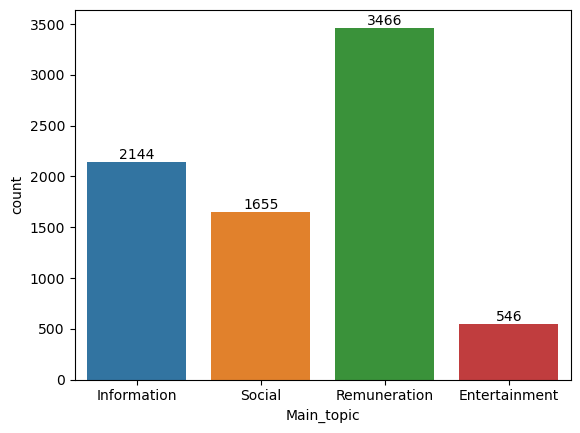

In [318]:
ax = sb.countplot(x= df_cln['Main_topic'])
ax.bar_label(ax.containers[0])

# 4. Research

## No. of Shares -> Post Engagement
### According to (source) the act of users sharing MGC posts on their Facebook timeline has a strong capability of boosting the reach of the post towards "friends of user" and even "friends of friends of the user", ultimately resulting in higher engagement. 

Hence, we will perform a <b>Pearson's correlation coefficient</b> test on those values in our dataset below, to test whether even in the case of theme park posts in the US, the notion that shares do indeed increase engagement is true. 

In [319]:
# Computing the pearson correlation coefficient
pears_corr = df_cln['Number of Shares'].corr(df_cln['Engagement'], method='pearson')
print('The pearson correlation coef for Number of Shares and post Engagement is: ',pears_corr)

The pearson correlation coef for Number of Shares and post Engagement is:  0.0814692531373398


### Result: In this dataset the correlation between Shares and Engagement does not inhibit a significant correlation between the two variables.

In [320]:
# # Create a log-transformed version of the 'num_shares' column
# log_num_shares = np.log10(df_cln['Number of Shares'])

# # Create a scatter plot with log-transformed 'num_shares' on the x-axis and 'engagement' on the y-axis
# plt.scatter(log_num_shares, df_cln['Engagement'])

# # Set the y-axis scale to log scale
# plt.yscale('log')

# # Set axis labels
# plt.xlabel('log(Number of Shares)')
# plt.ylabel('Engagement')

# # Show the plot
# plt.show()

Text(0.5, 0, 'Number of Shares')

(0.0, 10000.0)

(1e-08, 0.1)

Text(0, 0.5, 'Engagement')

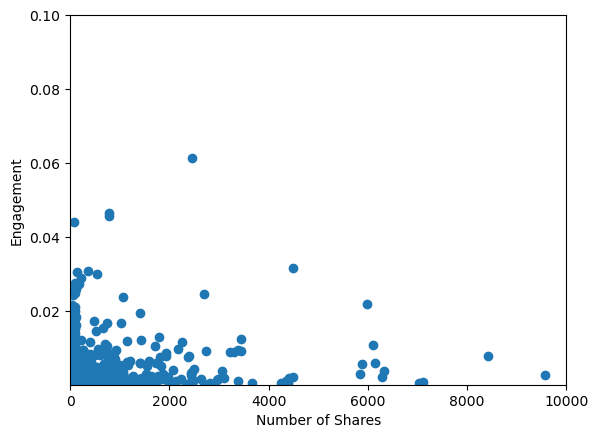

In [321]:
# Visualizing the relationship
plt.scatter(df_cln['Number of Shares'], df_cln['Engagement'])
plt.xlabel('Number of Shares')
plt.xlim([0, 10000])
plt.ylim([0.00000001, 0.1])
plt.ylabel('Engagement')
plt.show()

## Number of Shares -> Number of Reactions

In [322]:
# Computing the pearson correlation coefficient
pears_corr = df_cln['Number of Shares'].corr(df_cln['Number of Reactions'], method='pearson')
print('The pearson correlation coef for Number of Shares and Number of Reactions is: ',pears_corr)

The pearson correlation coef for Number of Shares and Number of Reactions is:  0.7731233187091081


## Hashtags present in text -> Engagement/ Number of Reactions

In [323]:
# Compute the mean of Engagement for post with/without hashtags present
Count_with_hashtags = df_cln['Has_hashtag'].sum()
Count_without_hashtags = len(df_cln) - Count_with_hashtags

In [324]:
print('Rows of text with at least 1 hashtag present: ', Count_with_hashtags)
print('Rows of text without any hashtag present: ', Count_without_hashtags)

Rows of text with at least 1 hashtag present:  1323
Rows of text without any hashtag present:  9789


In [325]:
# Generating simple descriptive statistics of posts with and without hashtags present
# With hashtags present
engagement_with_hashtags = df_cln.loc[df_cln['Has_hashtag'] == True, 'Engagement']
mean_with_hashtags = np.mean(engagement_with_hashtags)
median_with_hashtags = np.median(engagement_with_hashtags)
mode_with_hashtags = engagement_with_hashtags.mode().values
# Without hashtags present
engagement_no_hashtags = df_cln.loc[df_cln['Has_hashtag'] == False, 'Engagement']
mean_no_hashtags = np.mean(engagement_no_hashtags)
median_no_hashtags = np.median(engagement_no_hashtags)
mode_no_hashtags = engagement_no_hashtags.mode().values

print("Engagement with hashtags present:")
print("Mean: ", mean_with_hashtags)
print("Median: ", median_with_hashtags)
print("Mode: ", mode_with_hashtags)

print("\nEngagement with no hashtags present:")
print("Mean: ", mean_no_hashtags)
print("Median: ", median_no_hashtags)
print("Mode: ", mode_no_hashtags)

Engagement with hashtags present:
Mean:  0.0006629449456898248
Median:  0.00018343678169525536
Mode:  [5.61826339e-06 9.10138412e-05 1.14119722e-04 1.54918668e-04
 1.59506593e-04 2.55818574e-04 4.42312514e-04 1.08851564e-03
 2.31625549e-03]

Engagement with no hashtags present:
Mean:  0.0010101690502514217
Median:  0.0003249728301404309
Mode:  [0.]


### *As a t-test assumes that the sample size for both to be tested groups to be "roughly" equal we cannot use a t-test in this case.*

### Instead we opt for a chi-squared test below with a significance level of P ≤ 0.05

Research question: Does the presence of Hashtags in text description have a significant influence on the engagement value of a post? 

In [326]:
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(df_cln['Has_hashtag'], df_cln['Engagement'])
contingency_table

# Performing the test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Printing results
print('Chi-squared statistic:', chi2)
print('p-value:', p_val)

Engagement,0.000000e+00,9.364982e-07,1.364367e-06,1.440906e-06,1.471376e-06,1.476985e-06,1.494591e-06,1.627691e-06,1.632110e-06,1.654950e-06,...,3.008779e-02,3.042259e-02,3.075079e-02,3.167789e-02,4.405931e-02,4.561065e-02,4.646227e-02,6.136420e-02,1.413490e-01,5.685163e-01
Has_hashtag,,,,,,,,,,,,,,,,,,,,,
False,66,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
True,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Chi-squared statistic: 11048.580671016542
p-value: 0.2944279121378244


Research question: Does the presence of Hashtags in text description have a significant influence on the number of reaction that a post accures? 

In [327]:
# Create the contingency table
contingency_table = pd.crosstab(df_cln['Has_hashtag'], df_cln['Number of Reactions'])
contingency_table

# Performing the test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Printing results
print('Chi-squared statistic:', chi2)
print('p-value:', p_val)

Number of Reactions,0,1,2,3,4,5,6,7,8,9,...,39566,41452,49690,54955,65226,69400,71060,90470,99136,189901
Has_hashtag,,,,,,,,,,,,,,,,,,,,,
False,72,66,89,70,93,73,88,83,104,91,...,0,0,1,0,1,1,1,1,1,1
True,2,5,7,19,25,24,22,28,20,15,...,1,1,0,1,0,0,0,0,0,0


Chi-squared statistic: 1719.3189394128813
p-value: 0.1958261063479005


### Since in both our tests the P value (0.2944279121378244 and 0.1958261063479005) was higher than the predetermied significance level P ≤ 0.05 we failed to find a significant connection 

## Number of Reactions -> Page size category

To create additional dimensions in the dataset, to perform multilevel analysis, we created the categorical feature 'Page size' where we devide facebook Fan pages into four categories based on number of followers. Said categories are as follows:

*Page size:*

    Small: Less than 10,000 followers
    Medium: 10,000 to 50,000 followers
    Large: 50,000 to 500,000 followers
    Very Large: More than 500,000 followers

In [328]:
# Figuring out sample size of different categories
Page_size_freq = df_cln['Page_size'].value_counts()
Page_size_freq

Large         5379
Very Large    4972
Medium         729
Small           32
Name: Page_size, dtype: int64

As seen above; since brand pages with "Small" following (i.e. < than 10000 followers), are heavily under-represented in the dataset we <b>will be dropping them</b> for the remainder of the research

In [329]:
# Dropping the category 'Small'
df_cln = df_cln[df_cln['Page_size'] != 'Small']

Checking for relevance of dimensions of the dataset by assuming that 'Page size' has a significant influence on 'Number of reactions' <b>for P < 0.05</b>

*H0: There is no significant difference in the number of reactions on posts for Facebook pages, based on their page size categories*

H1: There is significant difference in the number of reactions on posts for FB pages, based on their page size categories


In [330]:
import scipy.stats as stats

# Grouping by 'Page size'
grouped_pages = df_cln.groupby('Page_size')

grouped_reactions_scrs = grouped_pages['Number of Reactions'].apply(list)

H, p = stats.kruskal(*grouped_reactions_scrs)

print('Kruskal-Wallis test results:')
print(f'H-statistic: {H}')
print(f'p-value: {p}')

Kruskal-Wallis test results:
H-statistic: 4171.231305282898
p-value: 0.0


Results:
The p-value of 0.0 indicates that the null hypothesis (There is no significant difference in the number of reactions on posts for Facebook pages, based on their page size categories) can be rejected at any reasonable level of significance.

To emphasize on this further, we will conduct a Dunn's test comparing the different groups for the same level of significance P < 0.05

In [331]:
import pandas as pd
import scikit_posthocs as sp


if 'Page_size' in df_cln.columns:
    df_test = df_cln.drop('Page_size', axis=1)[['Number of Reactions']]
else:
    df_test = df_cln[['Number of Reactions']]

# Group the data by 'Page size' and reset the index
grouped_data = df_test.groupby(df_cln['Page_size']).apply(lambda x: x.reset_index(drop=True)).reset_index(level=1, drop=True).reset_index()

# Rename the index column to 'Page_size'
grouped_data = grouped_data.rename(columns={'Page_size': 'group'})

# Perform Dunn's test as post-hoc
dunn_results = sp.posthoc_dunn(grouped_data, val_col='Number of Reactions', group_col='group')

# Print the results
print('Dunn test results:')
print(dunn_results)

Dunn test results:
                   Large        Medium  Very Large
Large       1.000000e+00  1.551029e-38         0.0
Medium      1.551029e-38  1.000000e+00         0.0
Very Large  0.000000e+00  0.000000e+00         1.0


Results: for comparisons between Large and Medium, Medium and Very Large, and Large and Very Large are all very small (less than 1e-38). Indicating that there are significant differences between these groups.

## Gunning-Fog score -> Number of Reactions

### Established in previous research, text that exhibits an abnormal amount of complex words as well as long stentences proves difficult to read to the average reader. Based on this logic we can establish that there is a chance that long and hard to read text will discourage users from interacting with posts and just scroll past them. 

*H0: There is no relationship between the number of reactions and the Gunning-fog score of the text of social media posts*

H1: There is a significant relationship between the Gunning-Fog score and the number of reactions for social media posts, higher Gunning-Fog scores are associated with fewer reactions

p < 0.05



Text(0.5, 0, 'Gunning-Fog score')

Text(0, 0.5, 'Number of Reactions')

Text(0.5, 1.0, 'Relationship between Gunning-Fog score and Number of Reactions')

(0.0, 40000.0)

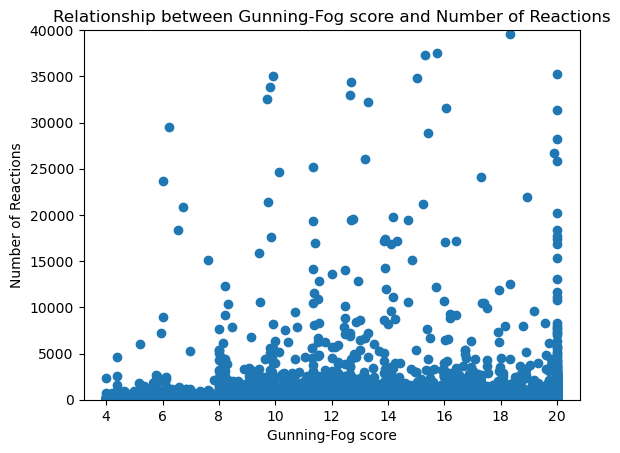

In [332]:
# Dropping rows with low Gunning-fog scores
df_text = df_text[df_text['Gunning-Fog Score'] >= 4.00]

# Plot a scatter plot of Gunning-Fog score vs. Number of Reactions
plt.scatter(df_text["Gunning-Fog Score"], df_text["Number of Reactions"])
plt.xlabel("Gunning-Fog score")
plt.ylabel("Number of Reactions")
plt.title("Relationship between Gunning-Fog score and Number of Reactions")
plt.ylim([0, 40000])
plt.show()

Text(0.5, 0, 'Gunning-Fog score')

Text(0, 0.5, 'Number of Reactions')

Text(0.5, 1.0, 'Relationship between Gunning-Fog score and Engagement')

(0.0, 0.07)

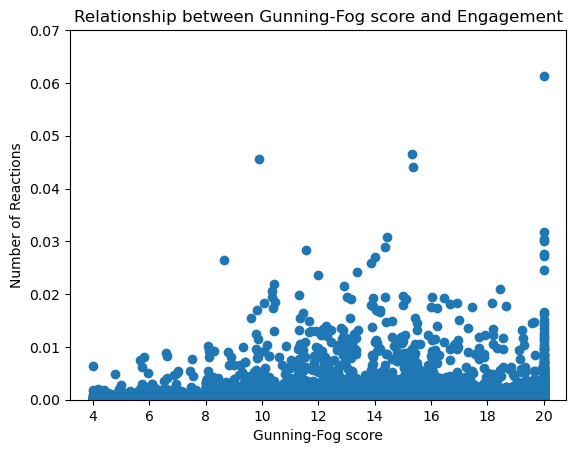

In [333]:
# Plot a scatter plot of Gunning-Fog score vs. Number of Reactions
plt.scatter(df_text["Gunning-Fog Score"], df_text["Engagement"])
plt.xlabel("Gunning-Fog score")
plt.ylabel("Number of Reactions")
plt.title("Relationship between Gunning-Fog score and Engagement")
plt.ylim([0, 0.07])
plt.show()

In [334]:
from sklearn.linear_model import LinearRegression

X = df_text['Gunning-Fog Score'].values.reshape(-1, 1)
y = df_text['Number of Reactions']

model = LinearRegression().fit(X, y)

# Print the model coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

Intercept: 638.8817076067924
Coefficient: -5.712286857738606


Results: The results of the Linear Regression indicate that, there is a negative relationship between the Gunning-Fog score and the number of reactions. Since the coefficient -5.857~, indicates that for each one-unit increase in the Gunning-Fog score, we expect to see a decrease of 5.86 in the number of reactions.

In [335]:
X = df_text['Gunning-Fog Score']
y = df_text['Number of Reactions']

# perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print("Slope (Coefficient):", slope)
print("Intercept:", intercept)
print("p-value:", p_value)

Slope (Coefficient): -5.712286857738621
Intercept: 638.8817076067926
p-value: 0.45596297594272917


Results: As the p-value of 0.44607~ indicates that there is not enough evidence to prove the relationship between the Gunning-Fog score and the number of Reactions, <b>we failed to reject the null hypothesis</b>.

### Content type -> Number of Reactions (ANOVA)

As different types of content are targeted towards different target groups for marketers, and different users on social media seek entertainement in different forms or feel more engaged towards different types of content, it is safe to assume that different types of content will accrue different amounts of user reactions on Facebook. Hence we propose the following Hypothesis: 

*H0: There is no significant difference in the mean Number of Reactions between the four Main_topic categories.*

H1: There is a significant difference in the mean Number of Reactions between the four Main_topic categories.

Below we perform a One-way ANOVA test to test the above mentioned assumption. 

In [336]:
df_cln

,Date,Day,Time,Profile,Page_size,Message,Number of Reactions,Number of Comments (primary),Number of Shares,Comments per post,...,Engagement,Profile-ID,Post-ID,Link,Character_cnt,Message_cln,No_of_hashtags,Hashtags_group,Has_hashtag,Main_topic
0,7/21/22 12:05 AM,7/21/22,12:05 AM,Cedar Point,Very Large,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",282,34,23,41,...,0.000222,1.062569e+10,10625691462_10158936706621463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158936706621463/?type=3,203,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",0,None,False,Information
1,7/18/22 9:00 PM,7/18/22,9:00 PM,Cedar Point,Very Large,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!? https://bit.ly/3IMfdzD",264,31,53,37,...,0.000227,1.062569e+10,10625691462_10158933698001463,https://www.facebook.com/10625691462/posts/10158933698001463/,227,"It’s Truce Day at Cedar Point, and you’re invited! Journey to Forbidden Frontier on Adventure Island, the possibilities are endless!? Open daily, except Wednesday's from 12pm-7pm now through August 14th!?",0,None,False,Social
2,7/17/22 6:42 PM,7/17/22,6:42 PM,Cedar Point,Very Large,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,406,18,22,23,...,0.000289,1.062569e+10,10625691462_10158932110481463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158932110481463/?type=3,114,Curtis the cow is awful hungry at The Barnyard! Pay him a visit the time you're at Cedar Point! ??Open 12pm daily!,0,None,False,Remuneration
3,7/16/22 3:16 PM,7/16/22,3:16 PM,Cedar Point,Very Large,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",214,173,13,189,...,0.000267,1.062569e+10,10625691462_10158930461101463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158930461101463/?type=3,116,"Which team do you got on Gemini?Comment ""??"" for the red train or ""?"" for the blue train! Let's see which team wins!",0,None,False,Remuneration
4,7/15/22 11:35 PM,7/15/22,11:35 PM,Cedar Point,Very Large,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover! https://bit.ly/3AZ3Y5j",422,39,11,55,...,0.000313,1.062569e+10,10625691462_10158929715101463,https://www.facebook.com/cedarpoint/photos/a.319129566462/10158929715101463/?type=3,266,"?Announcing a new member of our social media team...?Cedar Point welcomes Alyse Gillentine, Digital Communications Manager! Learn more about Alyse & her passion for the park in our latest blog entry, and tell us topics you'd like 2 c us cover!",0,None,False,Remuneration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16035,11/24/22 7:36 PM,11/24/22,7:36 PM,Adventure City,Medium,"November is a time to be thankful and we are thankful for YOU! We want to wish our guests, staff, vendors and community a wonderful, happy and healthy Thanksgiving. We are closed today to give our employees the time to spend with their friends and family. We will re-open Friday 11-6 Saturday & Sunday 11-7. #gobblegobble #family #friends #thanksgivingbreak #bestfunever #thankful #thanksgiving #november #placestovisit #familyfun #funforkids #adventurecity #adventuretime #amusementpark #themepark #orangecounty #california #anaheim #stanton #rollercoaster #train #pettingfarm @adventurec

In [337]:
from scipy.stats import f_oneway

# Perform a One-Way ANOVA test on topics and Number of Reactions
f_value, p_value = f_oneway(df_cln[df_cln['Main_topic'] == 'Information']['Number of Reactions'],
                            df_cln[df_cln['Main_topic'] == 'Social']['Number of Reactions'],
                            df_cln[df_cln['Main_topic'] == 'Remuneration']['Number of Reactions'],
                            df_cln[df_cln['Main_topic'] == 'Entertainment']['Number of Reactions'])

# print the results
print('F-value:', f_value)
print('p-value:', p_value)

if p_value < 0.05:
    print('Result: There is a statistically significant difference in mean Number of Reactions between the four categories.')
else:
    print('Result: There is no statistically significant difference in mean Number of Reactions between the four categories.')

F-value: 2.3563987820782115
p-value: 0.0698096686512796
Result: There is no statistically significant difference in mean Number of Reactions between the four categories.


Below we perform The Tukey's HSD test that allows to examine the differences between each pair of the 4 categories independently:

In [338]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # perform Tukey's HSD test
# tukey_results = pairwise_tukeyhsd(df_cln['Number of Reactions'], df_cln['Main_topic'])

# # print the results of the Tukey's HSD test
# print('\nTukey HSD results:')
# print(tukey_results)

Tukey HSD results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
======================================================================
    group1       group2     meandiff p-adj    lower     upper   reject
----------------------------------------------------------------------
Entertainment  Information  -38.1586    0.9989 -719.1317  642.8144  False

Entertainment Remuneration  457.7585    0.2693 -192.8392 1108.3561  False

Entertainment       Social  335.9244    0.6237 -380.8399 1052.6886  False

Information Remuneration  495.9171 <b>0.0199</b>   55.8974  935.9369   <b>True</b>

Information       Social   374.083      0.2714 -158.9189  907.0849  False

Remuneration       Social -121.8341     0.9209 -615.4373   371.769  False

Results:

Test results show that there <b>is a statistically significant difference</b> in mean Number of Reactions <b>between the Information and Remuneration categories</b> (p-adj < 0.05). The mean difference between the two categories is 495.9171, and the confidence interval for the difference does not contain 0 (lower=55.8974, upper=935.9369).

However, we failed to find statistically significant differences between the other category pairs.

### Multi-level analysis of the entire dataset (Lmer)

In [339]:
df_text.head(1)

,Profile,Page_size,Engagement,Number of Reactions,Number of Shares,Message,Message_cln,Has_hashtag,No_of_hashtags,Hashtags_group,Character_cnt,Message_no_hashlinks,Eng_lang,Gunning-Fog Score,Main_topic
0,Cedar Point,Very Large,0.000222,282,23,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access! ?",when you book a stay at hotel breakers the fun begins did you know you get access to discounted tickets to both cedar point and cedar point shores waterpark free parking and unlimited beach access,False,0,None,203,"When you book a stay at Hotel Breakers, the fun begins! Did you know you get access to discounted tickets to both Cedar Point and Cedar Point Shores Waterpark, free parking, and unlimited beach access!",True,17.428571,Information


In [340]:
df_multilvl = df_text[['Page_size','Number of Reactions','Main_topic','Character_cnt','No_of_hashtags','Gunning-Fog Score']]

In [341]:
# Drop the under represented group
df_multilvl = df_multilvl[df_multilvl['Page_size'] != 'Small']
# Drop NaNs
df_multilvl = df_multilvl.dropna(subset=['Main_topic'])

[Text(0, 0, '2005'), Text(0, 0, '1513'), Text(0, 0, '3153'), Text(0, 0, '482')]

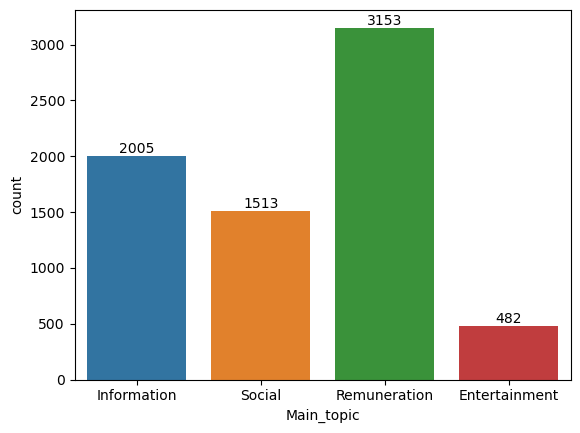

In [342]:
ax = sb.countplot(x= df_multilvl['Main_topic'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '3496'), Text(0, 0, '3133'), Text(0, 0, '524')]

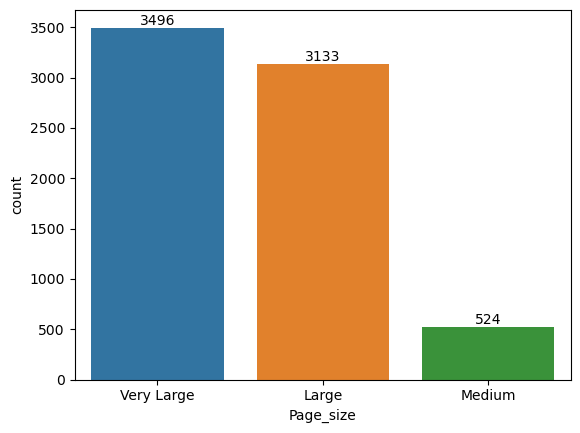

In [343]:
ax = sb.countplot(x= df_multilvl['Page_size'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '5390'),
 Text(0, 0, '1046'),
 Text(0, 0, '282'),
 Text(0, 0, '114'),
 Text(0, 0, '90'),
 Text(0, 0, '59'),
 Text(0, 0, '39'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

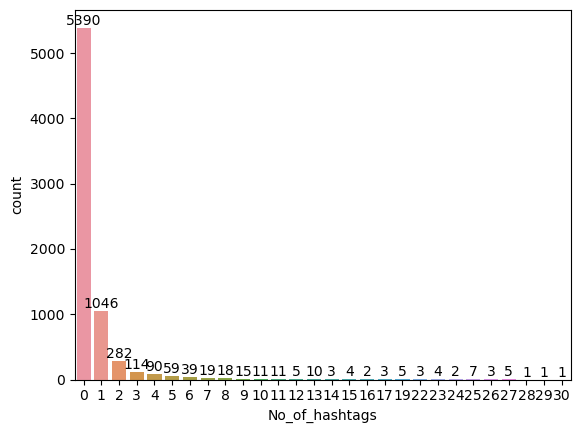

In [344]:
ax = sb.countplot(x= df_multilvl['No_of_hashtags'])
ax.bar_label(ax.containers[0])

In [345]:
# Changing categorical values to the Category datatype

df_multilvl['Main_topic'] = df_multilvl['Main_topic'].astype('str')
df_multilvl['Page_size'] = df_multilvl['Page_size'].astype('str')
df_multilvl['Main_topic'] = pd.Categorical(df_multilvl['Main_topic'], ordered=False)
df_multilvl['Page_size'] = pd.Categorical(df_multilvl['Page_size'], ordered=False)

df_multilvl = df_multilvl.rename(columns={"Number of Reactions": "Number_of_Reactions"})
df_multilvl = df_multilvl.rename(columns={"Gunning-Fog Score": "Gunning_Fog_Score"})

In [346]:
df_multilvl.head(1)

,Page_size,Number_of_Reactions,Main_topic,Character_cnt,No_of_hashtags,Gunning_Fog_Score
0,Very Large,282,Information,203,0,17.428571


Linear mixed model fit by REML [’lmerMod’]
Formula: Number_of_Reactions~Page_size+Main_topic+Character_cnt+No_of_hashtags+Gunning_Fog_Score+(1|Page_size)

Family: gaussian	 Inference: parametric

Number of observations: 7153	 Groups: {'Page_size': 3.0}

Log-likelihood: -67395.030 	 AIC: 134812.060

Random effects:

                  Name          Var       Std
Page_size  (Intercept)   120805.120   347.570
Residual                9047037.286  3007.829

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),38.699,-733.084,810.482,393.774,0.0,0.098,1.000,
Page_sizeMedium,-170.335,-1174.627,833.957,512.403,0.0,-0.332,1.000,
Page_sizeVery Large,659.675,-314.611,1633.961,497.094,0.0,1.327,1.000,
Main_topicInformation,-39.727,-341.425,261.971,153.930,7144.0,-0.258,0.796,
Main_topicRemuneration,153.225,-135.880,442.329,147.505,7144.0,1.039,0.299,
Main_topicSocial,180.730,-129.768,491.228,158.420,7144.0,1.141,0.254,
Character_cnt,-0.672,-1.085,-0.260,0.210,7144.0,-3.195,0.001,**
No_of_hashtags,-1.123,-32.978,30.731,16.253,7144.0,-0.069,0.945,
Gunning_Fog_Score,14.991,-2.166,32.148,8.754,7144.0,1.713,0.087,.


                          Estimate       2.5_ci      97.5_ci          SE  \
(Intercept)              38.699071  -733.083824   810.481965  393.774019   
Page_sizeMedium        -170.334859 -1174.626999   833.957281  512.403365   
Page_sizeVery Large     659.674856  -314.610856  1633.960568  497.093681   
Main_topicInformation   -39.726506  -341.424501   261.971489  153.930377   
Main_topicRemuneration  153.224578  -135.879713   442.328870  147.504900   
Main_topicSocial        180.729977  -129.767789   491.227743  158.420138   
Character_cnt            -0.672258    -1.084657    -0.259859    0.210412   
No_of_hashtags           -1.123189   -32.977726    30.731348   16.252614   
Gunning_Fog_Score        14.991299    -2.165841    32.148438    8.753804   

                                  DF    T-stat     P-val Sig  
(Intercept)             1.945433e-07  0.098277  0.999999      
Page_sizeMedium         1.394492e-07 -0.332423  0.999999      
Page_sizeVery Large     1.235154e-07  1.327063  0.

<AxesSubplot:xlabel='Estimate'>

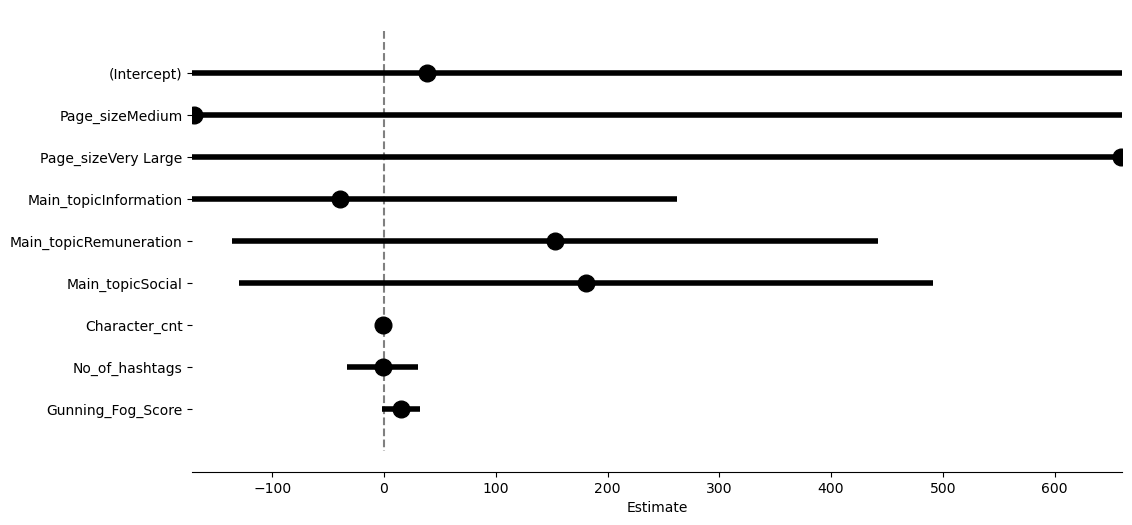

In [347]:
from pymer4 import Lmer

model = Lmer("Number_of_Reactions ~ Page_size + Main_topic + Character_cnt + No_of_hashtags + Gunning_Fog_Score + (1|Page_size)", data=df_multilvl)

# Print model summary
model.fit()

# Print model coefficients
print(model.coefs)

# Plot model results
model.plot_summary()

In [348]:
model.fixef

,(Intercept),Page_sizeMedium,Page_sizeVery Large,Main_topicInformation,Main_topicRemuneration,Main_topicSocial,Character_cnt,No_of_hashtags,Gunning_Fog_Score
Large,38.699071,-170.334859,659.674856,-39.726506,153.224578,180.729977,-0.672258,-1.123189,14.991299
Medium,38.699071,-170.334859,659.674856,-39.726506,153.224578,180.729977,-0.672258,-1.123189,14.991299
Very Large,38.699071,-170.334859,659.674856,-39.726506,153.224578,180.729977,-0.672258,-1.123189,14.991299


Results:

Table 1:
The intercept coefficient indicates the average value of the response variable (Number of Reactions) when all other predictors are equal to zero. In this case, the intercept is 126.55, which means that, on average, a Facebook post receives 126.55 reactions when all other predictors are equal to zero.

The coefficients for the Page_size variable show the difference in the average Number of Reactions between posts of medium and very large pages, and small pages are excluded due to the data cleaning process. According to the output, the average Number of Reactions for medium-sized pages is estimated to be 218.99 lower than that of very large pages.

The coefficients for the Main_topic variable indicate the difference in the average Number of Reactions between posts about Information, Renumeration, and Social, with Entertainment as the reference level. The output shows that, on average, posts about Renumeration receive 162.45 more reactions than posts about Entertainment, while posts about Information and Social receive 104.55 and 58.37 fewer reactions, respectively, compared to Entertainment posts.

The coefficients for Character_cnt and Gunning_Fog_Score variables show that they have a significant impact on the average Number of Reactions. The output indicates that an increase in the number of characters in the post description by one unit leads to a decrease of 0.68 in the average Number of Reactions. Similarly, an increase in the Gunning_Fog_Score by one unit leads to an increase of 14.03 in the average Number of Reactions.

Table 2:
If we fix the effects

In [349]:
#Exporting...
#df_text.to_csv(r'C:\Users\Trabala\Desktop\DMS Datasets\text_file.csv')